# 样本不平衡问题处理

这一步的原因：我们已经知道数据严重不平衡，因此必须要样本均衡

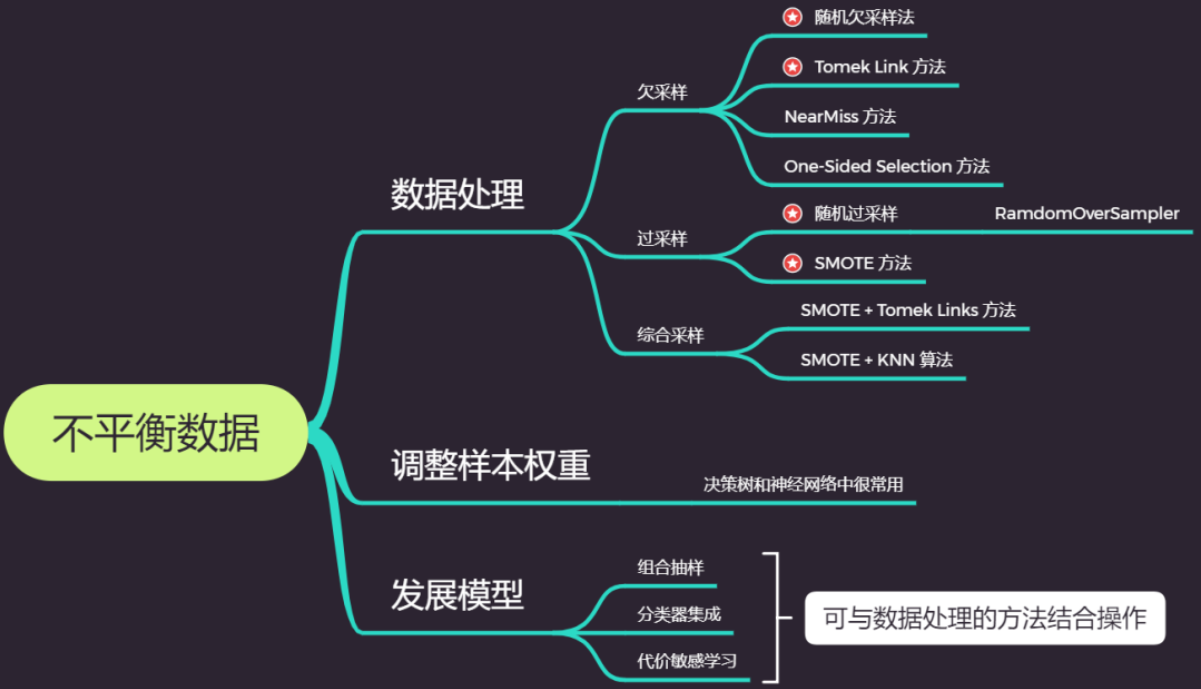

## 过采样

过采样：通过增加样本中小类样本的数据量来实现样本均衡。其中较为简单的方式是直接复制小类样本，形成数量上的均衡。但实际上，并没有为模型引入更多数据，过分强调正比例数据，会放大正比例噪音对模型的影响。即随机过采样采取简单复制样本的策略来增加少数类样本，这样容易产生模型过拟合的问题，即使得模型学习到的信息过于特别(Specific)而不够泛化(General)。

### 随机过采样 

In [206]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler   # 随机过采样
from collections import Counter

X_tr, X_te, Y_tr, Y_te = train_test_split(data_label.iloc[:,:-1],data_label.iloc[:,-1],random_state=1,test_size=0.25)   # 拆分训练集、测试集

# 采样start
print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
ros = RandomOverSampler(random_state=0,sampling_strategy='auto')  # 随机过采样
X_ros, y_ros = ros.fit_resample(X_tr, Y_tr)
print('随机过采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_ros)))
# 采样over

不经过任何采样处理的原始 y_train 中的分类情况：Counter({0: 7399, 1: 58})
随机过采样后，训练集 y_ros 中的分类情况：Counter({0: 7399, 1: 7399})


### SMOTE

SMOTE（Synthetic Minority Oversampling Technique）即合成少数类，它是基于随机过采样算法的一种改进方案，SMOTE算法的基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中。利用了K近邻的思想。    
算法流程如下：  
(1)对于少数类中每一个样本x，以欧氏距离为标准计算它到少数类样本集中所有样本的距离，得到其k近邻。  
(2)根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每一个少数类样本x，从其k近邻中随机选择若干个样本，假设选择的近邻为xn。  
(3)对于每一个随机选出的近邻xn，分别与原样本按照如下的公式构建新的样本。  
优缺点：  
虽然加强了原始数据中小众的占比，但增加了类之间重叠的可能性，模糊了正负类边界，且容易生成一些没有提供有益信息的样本。

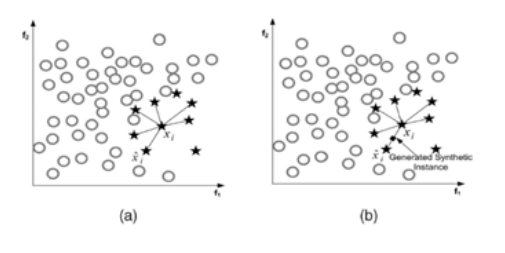

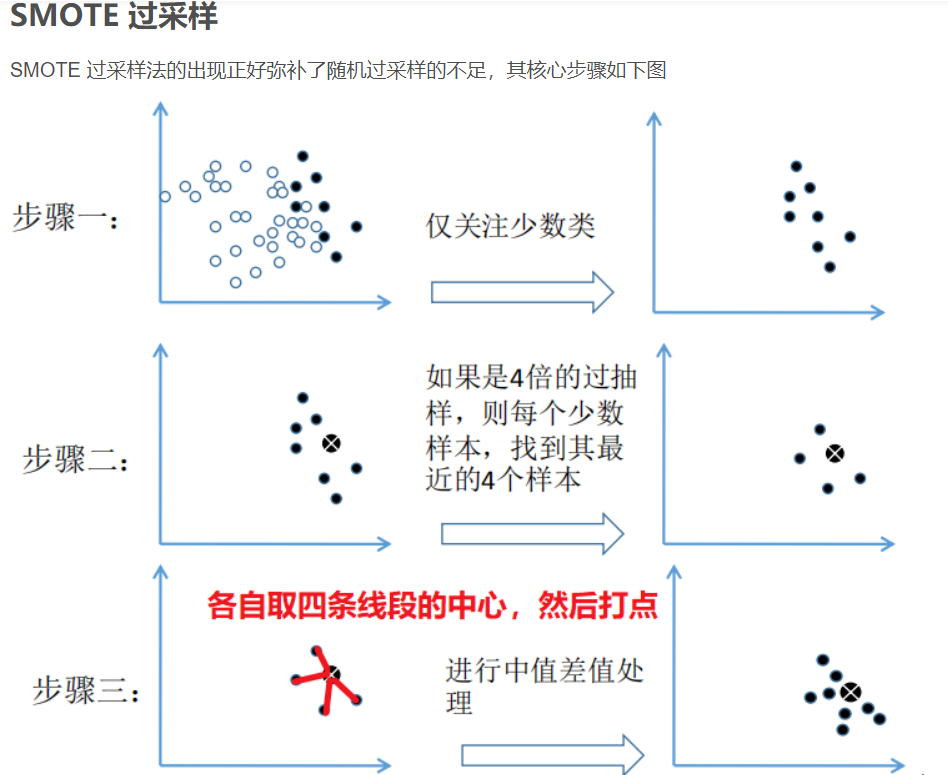

In [207]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter

X_tr, X_te, Y_tr, Y_te = train_test_split(data_label.iloc[:,:-1],data_label.iloc[:,-1],random_state=1,test_size=0.25)   # 拆分训练集、测试集

# 采样start
print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
sos = SMOTE(random_state=0)  # SMOTE采样
X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)
print('SMOTE采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_sos)))
# 采样over

不经过任何采样处理的原始 y_train 中的分类情况：Counter({0: 7399, 1: 58})
SMOTE采样后，训练集 y_ros 中的分类情况：Counter({0: 7399, 1: 7399})


## 欠采样

欠采样：通过减少多数类样本的样本数量来实现样本均衡。其中比较简单直接的方法就是随机去掉一些数据来减少多数类样本的规模，但这种方法可能会丢失一些重要的信息。还有一种方法就是，假设少数类样本数量为N，那就将多数类样本分为N个簇，取每个簇的中心点作为多数类的新样本，再加上少数类的所有样本进行训练。这样就可以保证了多数类样本在特征空间的分布特性。

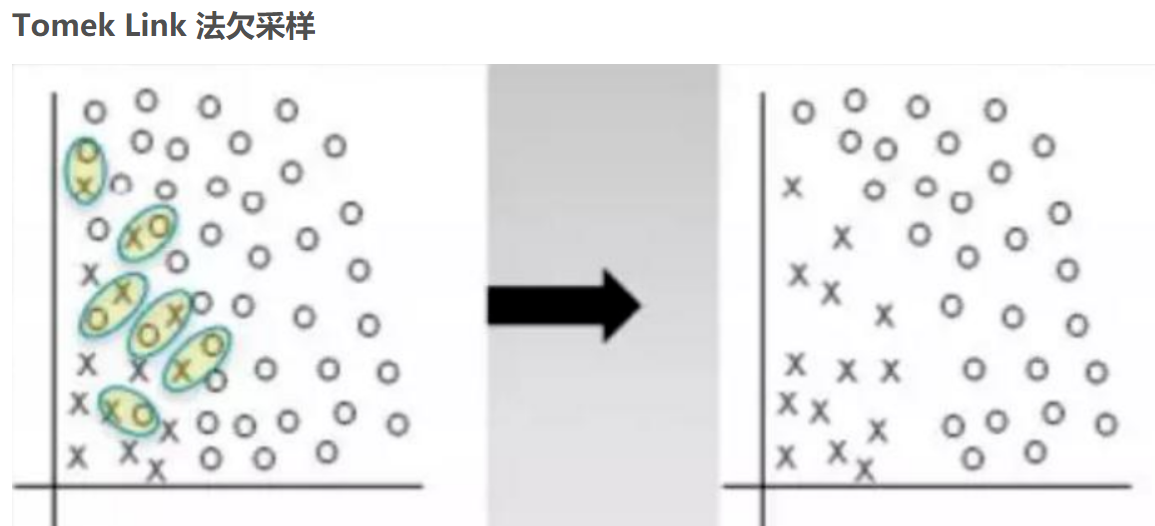

In [208]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler # 随机欠采样函数
from collections import Counter

X_tr, X_te, Y_tr, Y_te = train_test_split(data_label.iloc[:,:-1],data_label.iloc[:,-1],random_state=1,test_size=0.25)   # 拆分训练集、测试集

# 采样start
print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_tr, Y_tr)
print('欠采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_rus)))
# 采样over

不经过任何采样处理的原始 y_train 中的分类情况：Counter({0: 7399, 1: 58})
欠采样后，训练集 y_ros 中的分类情况：Counter({0: 58, 1: 58})


## 综合采样

目前为止我们使用的重采样方法几乎都是只针对某一类样本：对大众样本欠采样，对小众样本过采样。也经常有人将欠采样和过采样综合起来，解决样本类别分布不平衡和过拟合问题，如：SMOTE + Tomek links或SMOTE + ENN。即利用SMOTE方法生成新的小众样本，得到扩充后的数据集T，再用Tomek links方法剔除T中的Tomek links对，或利用ENN算法剔除T中超过一半近邻点都不属于大众样本的样本点。  
优缺点：  
增加了小众样本的数量，且减少了不同类别之间的样本重叠。

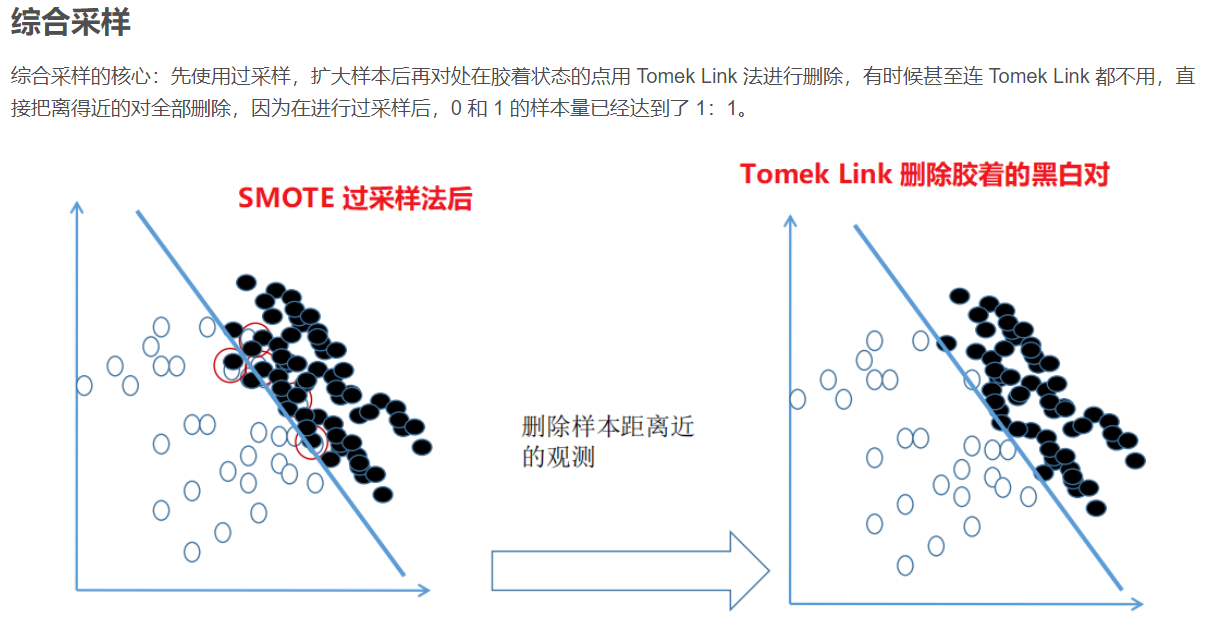

In [209]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek   # 综合采样
from collections import Counter

X_tr, X_te, Y_tr, Y_te = train_test_split(data_label.iloc[:,:-1],data_label.iloc[:,-1],random_state=1,test_size=0.25)   # 拆分训练集、测试集

# 采样start
print('不经过任何采样处理的原始 y_train 中的分类情况：{}'.format(Counter(Y_tr)))
kos = SMOTETomek(random_state=0)  # 综合采样
X_kos, y_kos = kos.fit_resample(X_tr, Y_tr)
print('综合采样后，训练集 y_ros 中的分类情况：{}'.format(Counter(y_kos)))
# 采样over

不经过任何采样处理的原始 y_train 中的分类情况：Counter({0: 7399, 1: 58})
综合采样后，训练集 y_ros 中的分类情况：Counter({0: 7399, 1: 7399})


data_new = pd.concat([X_kos,y_kos],axis=1)